# Name: Michael Lee

In [10]:
# Import data and basic libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

### Data Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
breast_cancer_data = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer_data.data,
                                columns=breast_cancer_data.feature_names)

# Partitioning data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_df, 
                                                    breast_cancer_data.target,
                                                    test_size=0.2,
                                                    random_state=42)

# Scaling features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training

In [12]:
# Helper method to evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred):
  return {
      'accuracy': accuracy_score(y_true, y_pred),
      'precision': precision_score(y_true, y_pred),
      'recall': recall_score(y_true, y_pred),
      'f1_score': f1_score(y_true, y_pred),
      'confusion_matrix': confusion_matrix(y_true, y_pred)
  }

#### KNN Model

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the KNN model with n_neighbors=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

In [14]:
# Hyperparameter tuning for KNN
from sklearn.model_selection import cross_val_score
best_k_mean = (0, 0)
for k in range(1, 11):
    knn_model_cv = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model_cv, X_train_scaled, y_train, cv=5)
    if cv_scores.mean() > best_k_mean[1]:
        best_k_mean = (k, cv_scores.mean())
print(f'Best K: {best_k_mean[0]} with Cross-Validation Accuracy: {best_k_mean[1]:.4f}')

# Create a new model based on the hyperparamter tuning results
best_knn_model = KNeighborsClassifier(n_neighbors=best_k_mean[0])
best_knn_model.fit(X_train_scaled, y_train)
best_knn_predictions = best_knn_model.predict(X_test_scaled)


Best K: 8 with Cross-Validation Accuracy: 0.9670


In [15]:
# KNN Model Evaluation
knn_model_metrics = evaluate_model(y_test, knn_predictions)
best_knn_model_metrics = evaluate_model(y_test, best_knn_predictions)

#### Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the Decision Tree model with the default parameters
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

In [17]:
# Hyperparameter tuning for Decision Tree

best_dt_mean = (0, 0)
for max_depth in range(1, 11):
    dt_model_cv = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    cv_scores = cross_val_score(dt_model_cv, X_train_scaled, y_train, cv=5)
    if cv_scores.mean() > best_dt_mean[1]:
        best_dt_mean = (max_depth, cv_scores.mean())
print(f'Best Max Depth: {best_dt_mean[0]} with Cross-Validation Accuracy: {best_dt_mean[1]:.4f}')

# Create a new model based on the hyperparamter tuning results
best_dt_model = DecisionTreeClassifier(max_depth=best_dt_mean[0], random_state=42)
best_dt_model.fit(X_train_scaled, y_train)
best_dt_predictions = best_dt_model.predict(X_test_scaled)

Best Max Depth: 3 with Cross-Validation Accuracy: 0.9319


In [18]:
# Decision Tree Model Evaluation
dt_model_metrics = evaluate_model(y_test, dt_predictions)
best_dt_model_metrics = evaluate_model(y_test, best_dt_predictions)

#### Random Forest Model

In [19]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

In [20]:
# Hyperparameter tuning for Random Forest
best_rf_mean = (0, 0, 0)
for max_depth in range(1, 11):
    for min_samples_split in range(2, 11):
        rf_model_cv = RandomForestClassifier(n_estimators=100,
                                            max_depth=max_depth, 
                                            min_samples_split=min_samples_split,
                                            random_state=42)
        cv_scores = cross_val_score(rf_model_cv, X_train_scaled, y_train, cv=5)
        if cv_scores.mean() > best_rf_mean[2]:
            best_rf_mean = (max_depth, min_samples_split, cv_scores.mean())
print(f"Best Max Depth: {best_rf_mean[0]}, Best Min Samples Split: {best_rf_mean[1]} with Cross-Validation Accuracy: {best_rf_mean[2]:.4f}")            

# Create a new model based on the hyperparamter tuning results
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=best_rf_mean[0], min_samples_split=best_rf_mean[1], random_state=42)
best_rf_model.fit(X_train_scaled, y_train)
best_rf_predictions = best_rf_model.predict(X_test_scaled)

Best Max Depth: 8, Best Min Samples Split: 3 with Cross-Validation Accuracy: 0.9626


In [21]:
# Evaluate Random Forest Models
rf_model_metrics = evaluate_model(y_test, rf_predictions)
best_rf_model_metrics = evaluate_model(y_test, best_rf_predictions)

### Evaluation

In [22]:
metrics_df = pd.DataFrame([knn_model_metrics, best_knn_model_metrics,
                              dt_model_metrics, best_dt_model_metrics,
                              rf_model_metrics, best_rf_model_metrics],
                        index=['KNN', 'KNN Tuned',
                              'Decision Tree', 'Decision Tree Tuned',
                              'Random Forest', 'Random Forest Tuned'])

display(metrics_df)

,accuracy,precision,recall,f1_score,confusion_matrix
KNN,0.947368,0.957746,0.957746,0.957746,"[[40, 3], [3, 68]]"
KNN Tuned,0.956140,0.971429,0.957746,0.964539,"[[41, 2], [3, 68]]"
Decision Tree,0.947368,0.957746,0.957746,0.957746,"[[40, 3], [3, 68]]"
Decision Tree Tuned,0.947368,0.945205,0.971831,0.958333,"[[39, 4], [2, 69]]"
Random Forest,0.964912,0.958904,0.985915,0.972222,"[[40, 3], [1, 70]]"
Random Forest Tuned,0.964912,0.958904,0.985915,0.972222,"[[40, 3], [1, 70]]"


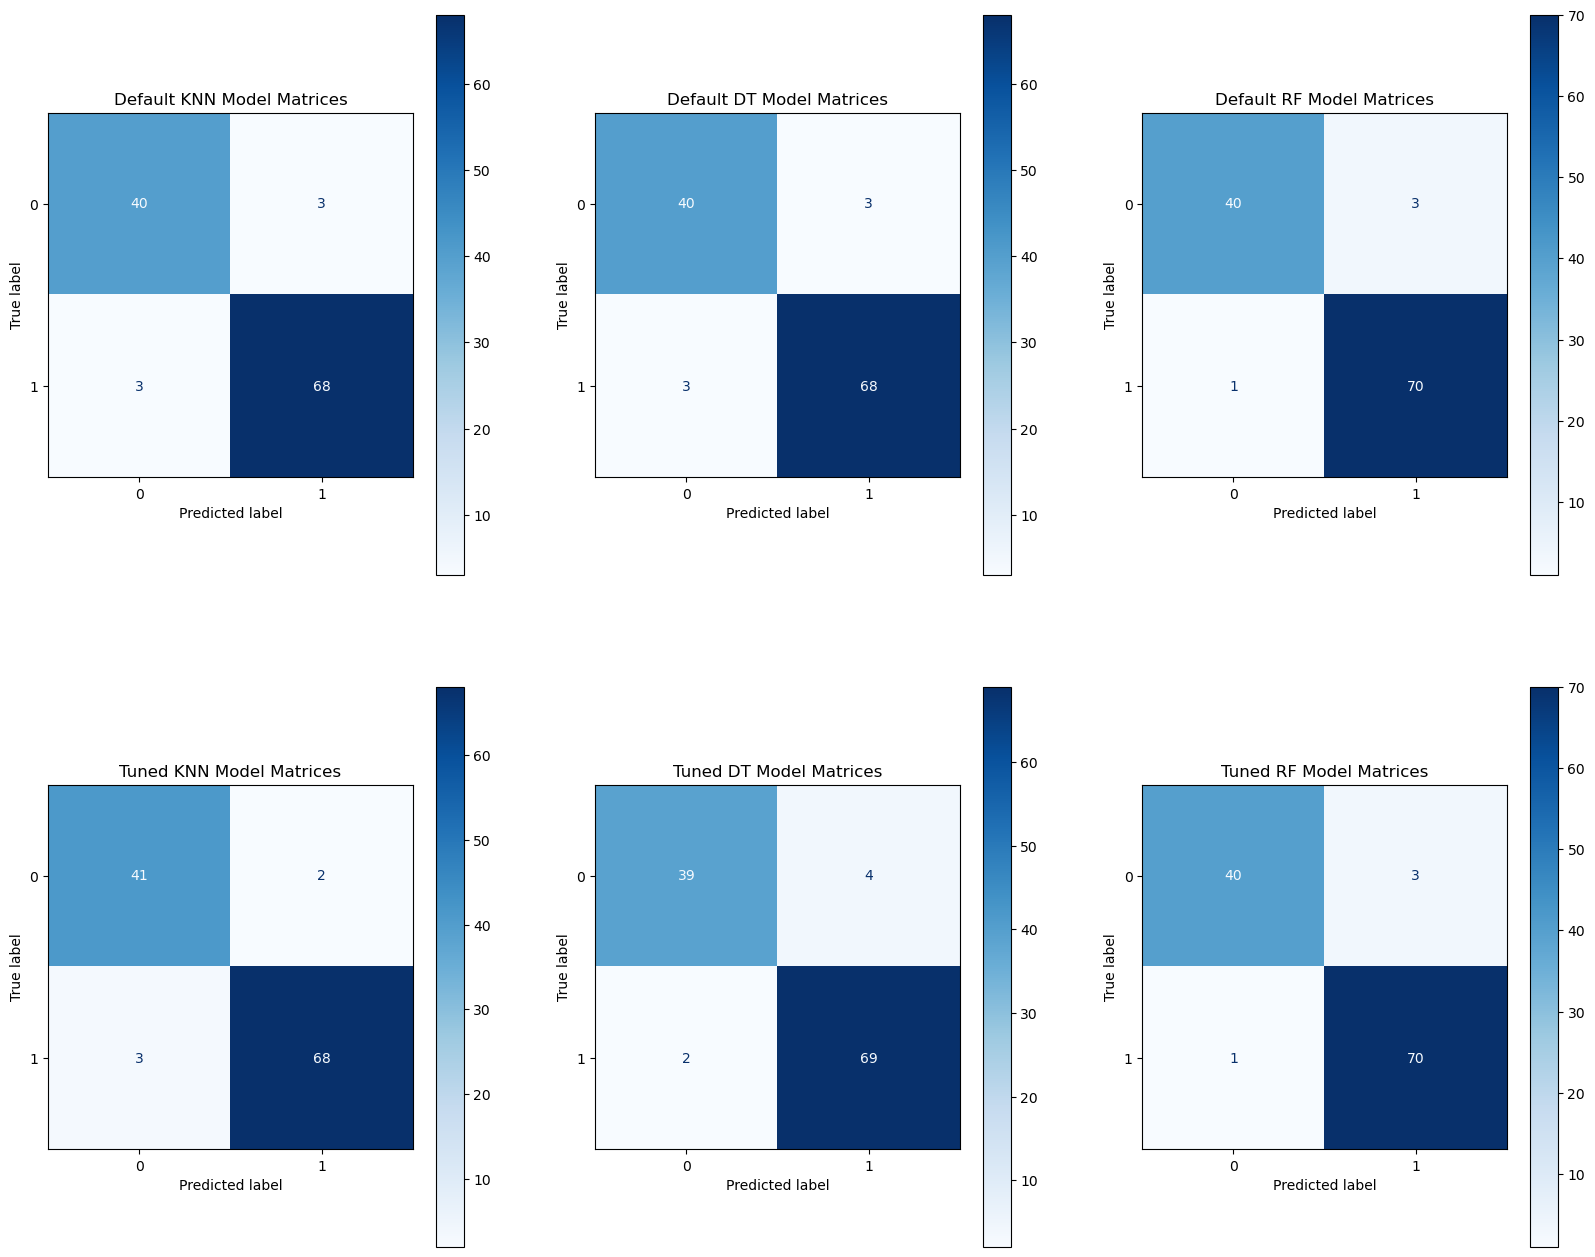

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(20, 16))

plt.subplot(2, 3, 1)
ConfusionMatrixDisplay.from_predictions(y_test, knn_predictions, ax=plt.gca(), cmap='Blues')
plt.title('Default KNN Model Matrices')
plt.subplot(2, 3, 4)
ConfusionMatrixDisplay.from_predictions(y_test, best_knn_predictions, ax=plt.gca(), cmap='Blues')
plt.title('Tuned KNN Model Matrices')
plt.subplot(2, 3, 2)
ConfusionMatrixDisplay.from_predictions(y_test, dt_predictions, ax=plt.gca(), cmap='Blues')
plt.title('Default DT Model Matrices')
plt.subplot(2, 3, 5)
ConfusionMatrixDisplay.from_predictions(y_test, best_dt_predictions, ax=plt.gca(), cmap='Blues')
plt.title('Tuned DT Model Matrices')
plt.subplot(2, 3, 3)
ConfusionMatrixDisplay.from_predictions(y_test, rf_predictions, ax=plt.gca(), cmap='Blues')
plt.title('Default RF Model Matrices')
plt.subplot(2, 3, 6)
ConfusionMatrixDisplay.from_predictions(y_test, best_rf_predictions, ax=plt.gca(), cmap='Blues')
plt.title('Tuned RF Model Matrices')

plt.show()